# Online Retailer: Predict Customer Lifetime Value 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Objective: Predict CLV of each customer for September, October, and November of 2011.

Nuno António - Rev. 1.00 - January, 2020

### Dataset description
Public dataset available at http://archive.ics.uci.edu/ml/datasets/online+retail.<br>
The dataset is composed of the following variables:<br>
- **InvoiceNo**: Invoice number.
- **StockCode**: Item code.
- **Description**: Item description.
- **Quantity**: Quantity bought.
- **InvoiceDate**: Invoice issue date (sell date).
- **Unit price**: Unit price.
- **CustomerID**: Customer ID.
- **Country**: Customer's country of origin. 

### Initial setup and modules/packages loading

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPRegressor

#to plot in notebook
%matplotlib inline

### Data understanding

In [3]:
# Load data (EXCEL not CSV format)
ds = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There is no column with the invoice line total

In [4]:
# Display top 15 rows
ds.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# Summary statistics for all variables
summary=ds.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,NaT,NaT,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,NaT,NaT,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,NaN,NaN,NaN,NaT,NaT,15287.7,1713.6,12346,13953,15152,16791,18287
Country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Summary statistis analysis:
- **CustomerID** was identified as a numerical column, but it's a categorical one
- **Quantity** and **UnitPrice** show negative minimums. Are these outliers or just incorrect values?
- **InvoiceDate** shows that data is not completed for December 2011

In [6]:
# Transform CustomerID to categorical
ds['CustomerID'] = ds['CustomerID'].astype('category')

In [7]:
# Create a column with the total per invoice line
ds['Total'] = ds['Quantity']*ds['UnitPrice']

In [8]:
# Do a new summary statistics for all variables
summary=ds.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,NaT,NaT,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,NaT,NaT,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,4372,17841,7983,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,541909,NaN,NaN,NaN,NaT,NaT,17.9878,378.811,-168470,3.4,9.75,17.4,168470


Atention!! There are many lines without **CustomerID**

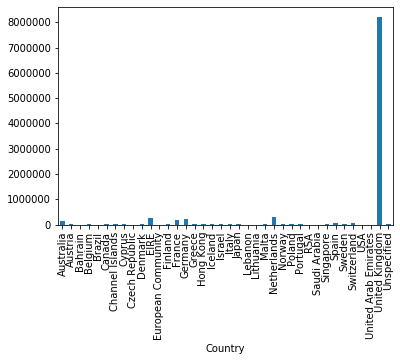

In [9]:
# Plot sales per country
ds.groupby('Country').Total.sum().plot(kind='bar')

In [10]:
# Calculate number of days in period
daysInPeriod = (ds.InvoiceDate.max() - ds.InvoiceDate.min()).days
daysInPeriod

373

#### Aggregate data by customer for RFM analysis (Recency, Frequency, Monetary Value)

In [11]:
# Drop columns not necessary for this exercise
ds.drop(columns=['StockCode','Description'], inplace=True)

In [12]:
# Remove incomplete month data
ds = ds[ds['InvoiceDate'] < '2011-12-01']

In [13]:
# Remove rows with negative negative quantities or price
ds = ds[(ds.Quantity>0) & (ds.UnitPrice>0)]

In [14]:
# Remove rows without CustomerID
ds = ds[pd.notnull(ds['CustomerID'])]

In [15]:
# Compute totals per customer
dateMax = ds.InvoiceDate.max()
X = ds.groupby(['CustomerID']).agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days, 
                                                    lambda date: (dateMax - date.max()).days],
                                  'InvoiceNo': lambda i: len(i.unique()),
                                  'Total': [sum, min, max]}).fillna(0)
X.columns = ['PurchaseDuration', 'Recency', 'Frequency', 'MonetaryValue', 'MinPerPurchase', 'MaxPerPurchase']

In [16]:
# Check results
X.describe()

,PurchaseDuration,Recency,Frequency,MonetaryValue,MinPerPurchase,MaxPerPurchase
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,122.975069,88.908280,4.060842,1919.765580,30.514125,144.789959
std,128.827245,98.428224,7.368396,8287.717984,1169.873897,1344.715992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,1.000000,291.762500,0.850000,30.600000
50%,77.500000,47.000000,2.000000,641.660000,5.040000,51.000000
75%,243.000000,140.000000,4.000000,1576.585000,9.950000,102.000000
max,364.000000,364.000000,200.000000,268478.000000,77183.600000,77183.600000


In [17]:
# Remove customer that did not make purchases
X = X[X.MonetaryValue>0]

In [18]:
# Compute global metris
returnRate = X[X.Frequency>1].shape[0]/X.shape[0]
churnRate = 1-returnRate

# Compute customer additional measures
X['AveragePurchaseValue'] = X.MonetaryValue/X.Frequency
X['AveragePurchaseFrequency'] = X.PurchaseDuration/X.Frequency

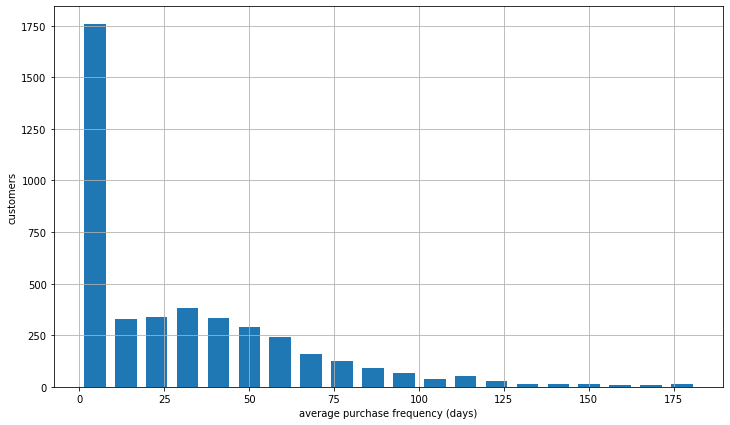

In [19]:
# Plot customers purchase frequency
ax = X['AveragePurchaseFrequency'].hist(
    bins=20,
    rwidth=0.7,
    figsize=(12,7)
)
ax.set_xlabel('average purchase frequency (days)')
ax.set_ylabel('customers')
plt.show()

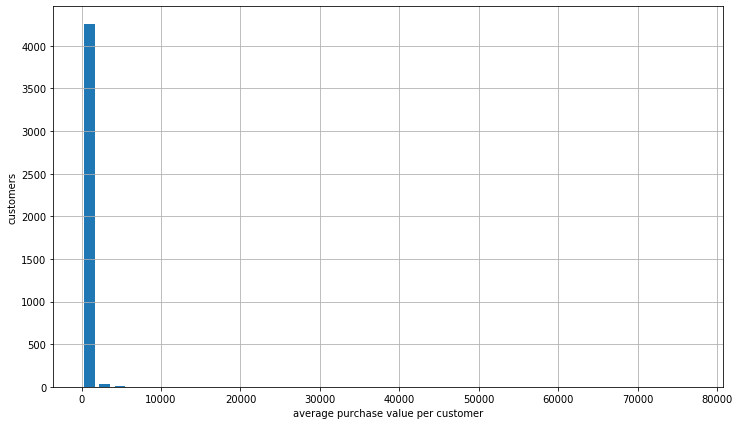

In [20]:
# Plot customers average purchase
ax = X['AveragePurchaseValue'].hist(
    bins=40,
    rwidth=0.7,
    figsize=(12,7)
)
ax.set_xlabel('average purchase value per customer')
ax.set_ylabel('customers')
plt.show()

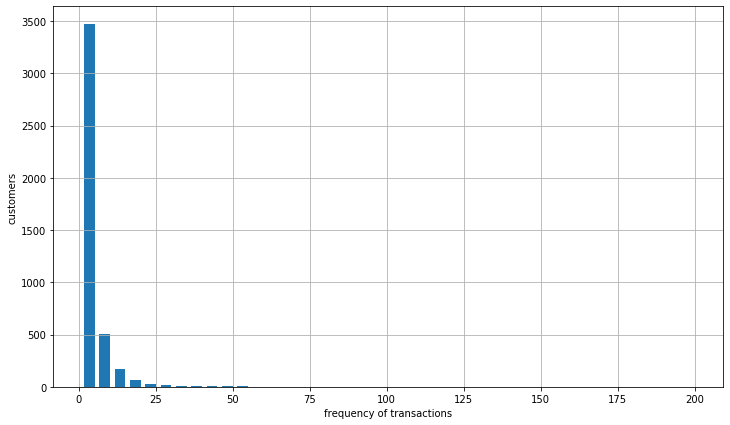

In [21]:
# Plot transactions per customer
ax = X['Frequency'].hist(
    bins=40,
    rwidth=0.7,
    figsize=(12,7)
)
ax.set_xlabel('frequency of transactions')
ax.set_ylabel('customers')
plt.show()

### Data preparation

In [22]:
# Compute RFM and other metrics for the first 9 months as the modeling dataset
dateMax = pd.to_datetime('2011-08-31')
X2 = ds[ds['InvoiceDate']<'2011-09-01'].groupby(['CustomerID']).agg(
    {'InvoiceDate': [lambda date: (date.max() - date.min()).days, 
                    lambda date: (dateMax - date.max()).days],
    'InvoiceNo': lambda i: len(i.unique()),
    'Total': [sum, min, max]}).fillna(0)
X2.columns = ['PurchaseDuration', 'Recency', 'Frequency', 'MonetaryValue', 'MinPerPurchase', 'MaxPerPurchase']

# Compute customer additional measures
X2['AveragePurchaseValue'] = X2.MonetaryValue/X2.Frequency
X2['AveragePurchaseFrequency'] = X2.PurchaseDuration/X2.Frequency

In [23]:
# Compute sales per customer last 3 months
sales = ds[ds['InvoiceDate']>'2011-08-31'].groupby(['CustomerID']).agg('Total').sum().fillna(0)
sales = sales.rename('CLV_Next3Months')

In [24]:
# Merge modeling dataset with sales following 3 months
X2 = X2.merge(sales.to_frame(), left_index=True, right_index=True).fillna(0)

In [25]:
# Remove customers who did not bought nothing in the first 9 months (new customers in the last 3 months)
X2 = X2[X2.MonetaryValue>0]

In [26]:
# Find and remove outliers

# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Find and remove outliers
cols = ['MonetaryValue']
X2 = removeOutliers(X2, colList=cols , lowPercentile=0.01, highPercentile=0.99, verbose=True)

      MonetaryValue
0.01        41.6160
0.99     14344.0432


### Modeling

In [27]:
# Create the Target
y = X2['CLV_Next3Months']

In [28]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X2, y, train_size = 0.75, test_size = 0.25, random_state = 123)

In [29]:
# Remove the Target from the training
X_train = X_train.drop(['CLV_Next3Months'],1)
X_test = X_test.drop(['CLV_Next3Months'],1)

In [30]:
# Normalize training data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [31]:
# Function to plot the learning curve
# From https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

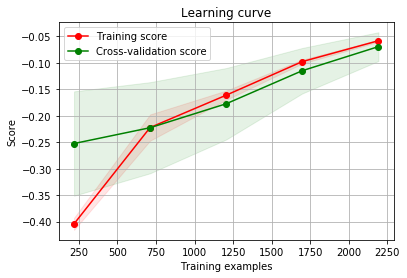

In [32]:
# Plot the learning curve
cv = 10
estimator = MLPRegressor(random_state=123, hidden_layer_sizes=6, max_iter=400)
plot_learning_curve(estimator, "Learning curve", X_train_scaled, y_train, cv=cv, n_jobs=4,
                  train_sizes=np.linspace(0.1, 1.0, 5))

In [33]:
# Create and train the model
nn_regr = estimator
nn_regr.fit(X_train_scaled, y_train)

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=6, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=400,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=123, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

### Evaluation

In [34]:
# predict y for X_train and X_test
y_pred_train = nn_regr.predict(X_train_scaled) 
y_pred_test = nn_regr.predict(X_test_scaled) 

In [35]:
# Function to calculate MAPE metric
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [36]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


,Measure,Train,Test
0,MAE,5.289084e+02,485.243687
1,RMSE,1.219871e+03,941.688097
2,R^2,-2.577126e-02,-0.013719
3,MAPE (%),inf,inf
4,MAX Error,1.903332e+04,9241.694987


In [37]:
# Visualize predictions vs close values 
temp = y_test.to_frame()
temp['Predictions'] = y_pred_test
temp

,CLV_Next3Months,Predictions
CustomerID,,
14640.0,624.02,252.626323
16066.0,1205.49,163.912930
16327.0,1374.58,351.965368
16690.0,139.08,183.680013
17703.0,307.78,182.425743
12852.0,0.00,231.958921
17744.0,303.06,307.198474
12662.0,971.17,354.243673
13477.0,555.03,287.717510


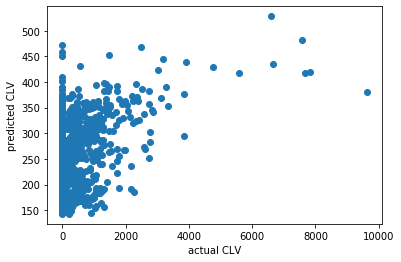

In [38]:
# Plot predictions vs actual value
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.set_xlabel('actual CLV')
ax.set_ylabel('predicted CLV')
fig.figsize=(12,7)
plt.show()

<font color='blue'>C1: Try to optimize results. Tip: Create features to capture time, such as week number,day in year, etc.</font>